# problem statement

question.Given data belongs to restaurant chains which provide food in two ways (1.eatin,2.takeaway) for a particular period.
answer.our prediction is to build model that can mostly explain the no customers for that levels for the upcoming year


In [1]:
import os 
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt


from datetime import datetime
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
os.chdir('C:/Users/SivaKumar/Documents/mithmain')

In [3]:
train=pd.read_csv('Train.csv',na_values=(''))

In [28]:
test=pd.read_csv('Test.csv',na_values=(''))

In [5]:
train.shape,test.shape

((65552, 6), (14850, 5))

In [6]:
train.head()

,date_of_operation,restaurant_type,branch_identifier,state_of_operation,region_of_operation,number_of_customers
0,01-04-2017,eat-in,branch_num_1.0,WEST BENGAL,EAST,40
1,03-04-2017,eat-in,branch_num_1.0,WEST BENGAL,EAST,5
2,04-04-2017,eat-in,branch_num_1.0,WEST BENGAL,EAST,4
3,05-04-2017,eat-in,branch_num_1.0,WEST BENGAL,EAST,113
4,07-04-2017,eat-in,branch_num_1.0,WEST BENGAL,EAST,76


In [7]:
test.head()

,date_of_operation,restaurant_type,branch_identifier,state_of_operation,region_of_operation
0,2-6-19,eat-in,branch_num_1.0,WEST BENGAL,EAST
1,2-7-19,eat-in,branch_num_1.0,WEST BENGAL,EAST
2,2-8-19,eat-in,branch_num_1.0,WEST BENGAL,EAST
3,2-9-19,eat-in,branch_num_1.0,WEST BENGAL,EAST
4,2-10-19,eat-in,branch_num_1.0,WEST BENGAL,EAST


In [8]:
train.describe(include='all')

,date_of_operation,restaurant_type,branch_identifier,state_of_operation,region_of_operation,number_of_customers
count,65552,65552,65552,65552,54448,65552.000000
unique,694,2,84,20,5,NaN
top,08-10-2018,eat-in,not_available,MAHARASHTRA,EAST,NaN
freq,99,54448,11104,9222,17712,NaN
mean,NaN,NaN,NaN,NaN,NaN,181.340264
std,NaN,NaN,NaN,NaN,NaN,726.179674
min,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,15.000000
75%,NaN,NaN,NaN,NaN,NaN,58.000000


In [9]:
train.columns

Index(['date_of_operation', 'restaurant_type', 'branch_identifier',
       'state_of_operation', 'region_of_operation', 'number_of_customers'],
      dtype='object')

In [10]:
test.columns

Index(['date_of_operation', 'restaurant_type', 'branch_identifier',
       'state_of_operation', 'region_of_operation'],
      dtype='object')

# visualisation

In [11]:
test.drop(['date_of_operation'],inplace=True,axis=1)


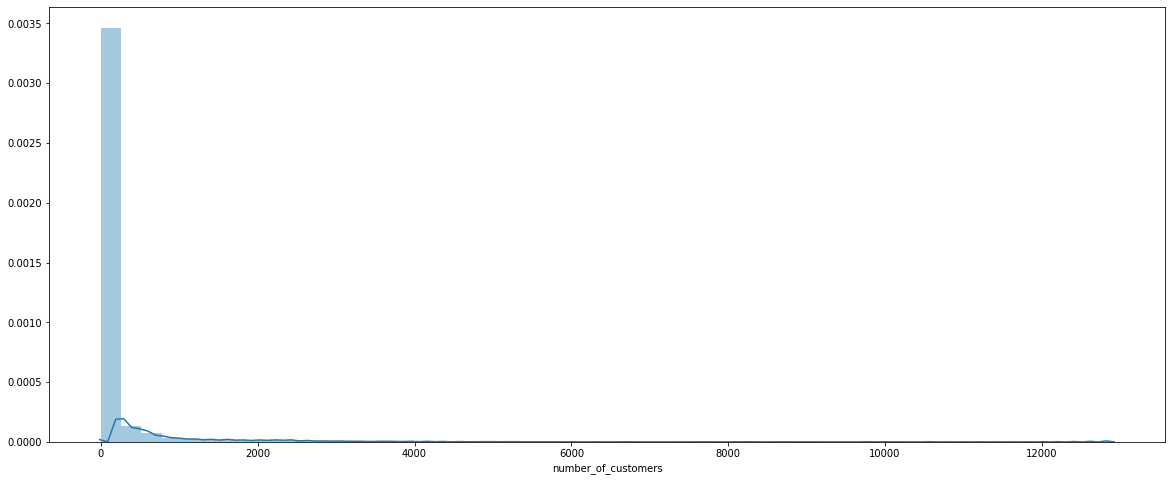

In [12]:
plt.figure(figsize=(20,8))
sns.distplot(train.number_of_customers)


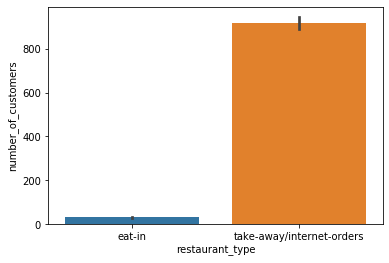

In [13]:
sns.barplot(train.restaurant_type,train.number_of_customers)

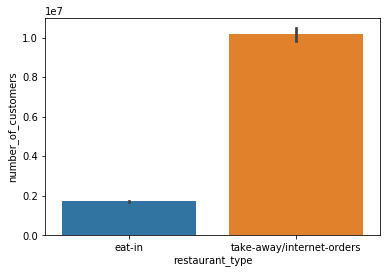

In [14]:
sns.barplot(train.restaurant_type,train.number_of_customers,estimator=sum)

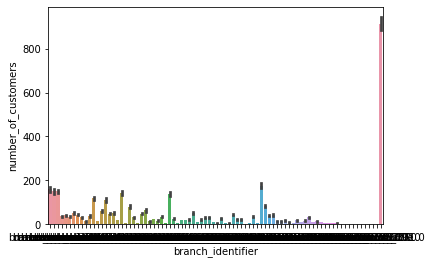

In [15]:
sns.barplot(train.branch_identifier,train.number_of_customers)

In [16]:
train.branch_identifier.value_counts()

not_available       11104
branch_num_120.0      656
branch_num_36.0       656
branch_num_1.0        656
branch_num_101.0      656
                    ...  
branch_num_79.0       656
branch_num_13.0       656
branch_num_159.0      656
branch_num_82.0       656
branch_num_78.0       656
Name: branch_identifier, Length: 84, dtype: int64

In [17]:
train.branch_identifier.describe()

count             65552
unique               84
top       not_available
freq              11104
Name: branch_identifier, dtype: object

In [18]:
train.head()

,date_of_operation,restaurant_type,branch_identifier,state_of_operation,region_of_operation,number_of_customers
0,01-04-2017,eat-in,branch_num_1.0,WEST BENGAL,EAST,40
1,03-04-2017,eat-in,branch_num_1.0,WEST BENGAL,EAST,5
2,04-04-2017,eat-in,branch_num_1.0,WEST BENGAL,EAST,4
3,05-04-2017,eat-in,branch_num_1.0,WEST BENGAL,EAST,113
4,07-04-2017,eat-in,branch_num_1.0,WEST BENGAL,EAST,76


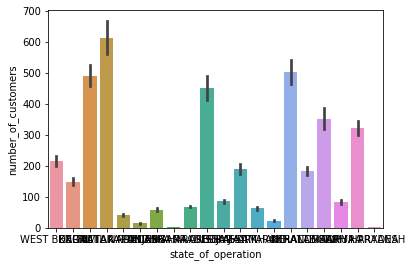

In [19]:
sns.barplot(train.state_of_operation,train.number_of_customers)

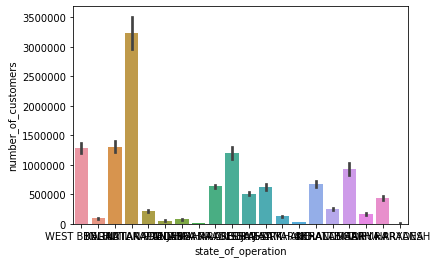

In [20]:
sns.barplot(train.state_of_operation,train.number_of_customers,estimator=sum)

In [21]:
train.state_of_operation.value_counts()

MAHARASHTRA       9222
GUJARAT           5942
WEST BENGAL       5942
TAMIL NADU        5286
UTTAR PRADESH     5286
PUNJAB            3974
ANDHRA PRADESH    3936
ASSAM             3318
HARYANA           3318
ORISSA            2662
KARNATAKA         2662
BIHAR             2662
JHARKHAND         2006
TRIPURA           2006
KERALA            1350
CHHATTISGARH      1350
MADHYA PRADESH    1350
TELANGANA         1312
UTTARAKHAND       1312
DELHI              656
Name: state_of_operation, dtype: int64

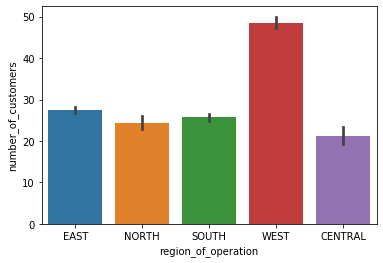

In [22]:
sns.barplot(train.region_of_operation,train.number_of_customers)

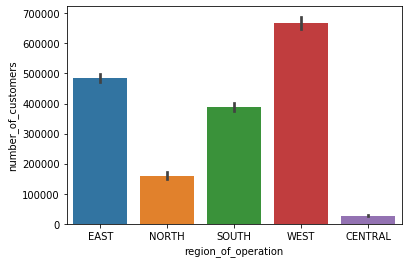

In [23]:
sns.barplot(train.region_of_operation,train.number_of_customers,estimator=sum)

# day and week extraction

In [30]:
train.date_of_operation = pd.to_datetime(train.date_of_operation)


In [31]:
test.date_of_operation = pd.to_datetime(test.date_of_operation)


In [32]:
train.dtypes

date_of_operation      datetime64[ns]
restaurant_type                object
branch_identifier              object
state_of_operation             object
region_of_operation            object
number_of_customers             int64
dtype: object

In [29]:
test.columns

Index(['date_of_operation', 'restaurant_type', 'branch_identifier',
       'state_of_operation', 'region_of_operation'],
      dtype='object')

In [33]:
train.columns

Index(['date_of_operation', 'restaurant_type', 'branch_identifier',
       'state_of_operation', 'region_of_operation', 'number_of_customers'],
      dtype='object')

In [34]:
train['weeks'] = train['date_of_operation'].dt.week


In [35]:
test['weeks'] = test['date_of_operation'].dt.week

In [36]:
train['days'] = train['date_of_operation'].dt.day


In [37]:
test['days'] = test['date_of_operation'].dt.day

In [38]:
train.tail(20)

,date_of_operation,restaurant_type,branch_identifier,state_of_operation,region_of_operation,number_of_customers,weeks,days
65532,2019-04-02,take-away/internet-orders,not_available,WEST BENGAL,NaN,321,14,2
65533,2019-05-02,take-away/internet-orders,not_available,WEST BENGAL,NaN,326,18,2
65534,2019-06-02,take-away/internet-orders,not_available,WEST BENGAL,NaN,372,22,2
65535,2019-07-02,take-away/internet-orders,not_available,WEST BENGAL,NaN,375,27,2
65536,2019-08-02,take-away/internet-orders,not_available,WEST BENGAL,NaN,546,31,2
65537,2019-09-02,take-away/internet-orders,not_available,WEST BENGAL,NaN,556,36,2
65538,2019-10-02,take-away/internet-orders,not_available,WEST BENGAL,NaN,510,40,2
65539,2019-11-02,take-away/internet-orders,not_available,WEST BENGAL,NaN,1302,44,2
65540,2019-12-02,take-away/internet-orders,not_available,WEST BENGAL,NaN,1246,49,2
65541,2019-02-13,take-away/internet-orders,not_available,WEST BENGAL,NaN,2469,7,13


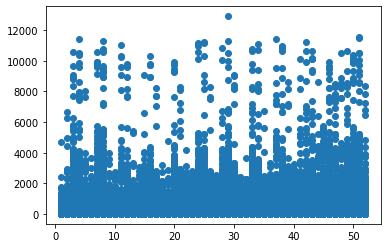

In [39]:
plt.scatter(train.weeks,train.number_of_customers)

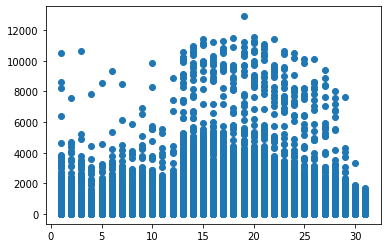

In [40]:
plt.scatter(train.days,train.number_of_customers)

In [41]:
datecolumn=pd.DataFrame(train['date_of_operation'])

In [42]:
#datecolumntest=pd.DataFrame(test['date_of_operation'])

In [43]:
#train.drop(['date_of_operation'],inplace=True,axis=1)
#test.drop(['date_of_operation'],inplace=True,axis=1)



In [44]:
import datetime

In [45]:
train.head()

,date_of_operation,restaurant_type,branch_identifier,state_of_operation,region_of_operation,number_of_customers,weeks,days
0,2017-01-04,eat-in,branch_num_1.0,WEST BENGAL,EAST,40,1,4
1,2017-03-04,eat-in,branch_num_1.0,WEST BENGAL,EAST,5,9,4
2,2017-04-04,eat-in,branch_num_1.0,WEST BENGAL,EAST,4,14,4
3,2017-05-04,eat-in,branch_num_1.0,WEST BENGAL,EAST,113,18,4
4,2017-07-04,eat-in,branch_num_1.0,WEST BENGAL,EAST,76,27,4


# null values 

In [46]:
train.isnull().sum()

date_of_operation          0
restaurant_type            0
branch_identifier          0
state_of_operation         0
region_of_operation    11104
number_of_customers        0
weeks                      0
days                       0
dtype: int64

In [47]:
train.region_of_operation.describe()

count     54448
unique        5
top        EAST
freq      17712
Name: region_of_operation, dtype: object

In [48]:
train['region_of_operation'].fillna(train['region_of_operation'].mode()[0],inplace=True)   #for mode imputing
test['region_of_operation'].fillna(test['region_of_operation'].mode()[0],inplace=True)   #for mode imputing


In [49]:
train.isnull().sum()

date_of_operation      0
restaurant_type        0
branch_identifier      0
state_of_operation     0
region_of_operation    0
number_of_customers    0
weeks                  0
days                   0
dtype: int64

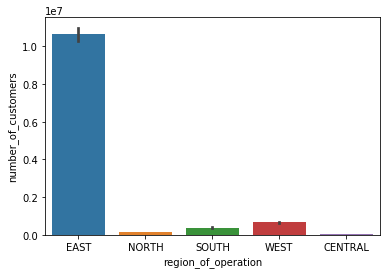

In [50]:
sns.barplot(train.region_of_operation,train.number_of_customers,estimator=sum)

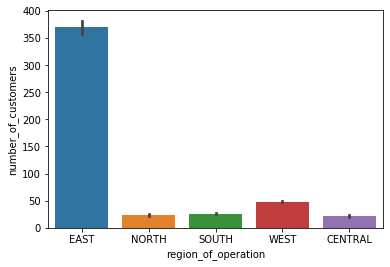

In [51]:
sns.barplot(train.region_of_operation,train.number_of_customers)

In [52]:
train.isnull().sum()

date_of_operation      0
restaurant_type        0
branch_identifier      0
state_of_operation     0
region_of_operation    0
number_of_customers    0
weeks                  0
days                   0
dtype: int64

# adding preferences for a particular level in a column

In [53]:
train.region_of_operation[(train.region_of_operation=='WEST')|(train.region_of_operation=='SOUTH')]='secondregion'
test.region_of_operation[(test.region_of_operation=='WEST')|(test.region_of_operation=='SOUTH')]='secondregion'

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [54]:
train.region_of_operation[(train.region_of_operation=='NORTH')|(train.region_of_operation=='CENTRAL')]='thirdregion'
test.region_of_operation[(test.region_of_operation=='NORTH')|(test.region_of_operation=='CENTRAL')]='thirdregion'

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
train.region_of_operation[train.region_of_operation=='EAST']=3
test.region_of_operation[test.region_of_operation=='EAST']=3

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
train.region_of_operation[train.region_of_operation=='secondregion']=2
test.region_of_operation[test.region_of_operation=='secondregion']=2

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
train.region_of_operation[train.region_of_operation=='thirdregion']=1
test.region_of_operation[test.region_of_operation=='thirdregion']=1

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
train.head()

,date_of_operation,restaurant_type,branch_identifier,state_of_operation,region_of_operation,number_of_customers,weeks,days
0,2017-01-04,eat-in,branch_num_1.0,WEST BENGAL,3,40,1,4
1,2017-03-04,eat-in,branch_num_1.0,WEST BENGAL,3,5,9,4
2,2017-04-04,eat-in,branch_num_1.0,WEST BENGAL,3,4,14,4
3,2017-05-04,eat-in,branch_num_1.0,WEST BENGAL,3,113,18,4
4,2017-07-04,eat-in,branch_num_1.0,WEST BENGAL,3,76,27,4


In [59]:
train.state_of_operation[train.state_of_operation=='MAHARASHTRA']=6
test.state_of_operation[test.state_of_operation=='MAHARASHTRA']=6

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
train.state_of_operation[(train.state_of_operation=='GUJARAT')|(train.state_of_operation=='WEST BENGAL')|(train.state_of_operation=='UTTAR PRADESH')|(train.state_of_operation=='TAMIL NADU')]=5
test.state_of_operation[(test.state_of_operation=='GUJARAT')|(test.state_of_operation=='WEST BENGAL')|(test.state_of_operation=='UTTAR PRADESH')|(test.state_of_operation=='TAMIL NADU')]=5

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
train.state_of_operation[(train.state_of_operation=='PUNJAB')|(train.state_of_operation=='ANDHRA PRADESH')|(train.state_of_operation=='HARYANA')|(train.state_of_operation=='ASSAM')]=4
test.state_of_operation[(test.state_of_operation=='PUNJAB')|(test.state_of_operation=='ANDHRA PRADESH')|(test.state_of_operation=='HARYANA')|(test.state_of_operation=='ASSAM')]=4

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [62]:
train.state_of_operation[(train.state_of_operation=='ORISSA')|(train.state_of_operation=='BIHAR')|(train.state_of_operation=='KARNATAKA')|(train.state_of_operation=='TRIPURA')|(train.state_of_operation=='JHARKHAND')]=3
test.state_of_operation[(test.state_of_operation=='ORISSA')|(test.state_of_operation=='BIHAR')|(test.state_of_operation=='KARNATAKA')|(test.state_of_operation=='TRIPURA')|(test.state_of_operation=='JHARKHAND')]=3

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [63]:
train.state_of_operation[(train.state_of_operation=='KERALA')|(train.state_of_operation=='CHHATTISGARH')|(train.state_of_operation=='MADHYA PRADESH')|(train.state_of_operation=='TELANGANA')|(train.state_of_operation=='UTTARAKHAND')]=2
test.state_of_operation[(test.state_of_operation=='KERALA')|(test.state_of_operation=='CHHATTISGARH')|(test.state_of_operation=='MADHYA PRADESH')|(test.state_of_operation=='TELANGANA')|(test.state_of_operation=='UTTARAKHAND')]=2

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [64]:
train.state_of_operation.value_counts()

5        22456
4        14546
3        11998
6         9222
2         6674
DELHI      656
Name: state_of_operation, dtype: int64

In [65]:
train.state_of_operation[train.state_of_operation=='DELHI']=1
test.state_of_operation[test.state_of_operation=='DELHI']=1

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [66]:
train.state_of_operation.value_counts()

5    22456
4    14546
3    11998
6     9222
2     6674
1      656
Name: state_of_operation, dtype: int64

In [67]:
train.branch_identifier.value_counts()

not_available       11104
branch_num_120.0      656
branch_num_36.0       656
branch_num_1.0        656
branch_num_101.0      656
                    ...  
branch_num_79.0       656
branch_num_13.0       656
branch_num_159.0      656
branch_num_82.0       656
branch_num_78.0       656
Name: branch_identifier, Length: 84, dtype: int64

In [68]:
train.drop(['branch_identifier'],axis=1,inplace=True)
test.drop(['branch_identifier'],axis=1,inplace=True)

In [69]:
train.restaurant_type.value_counts()

eat-in                       54448
take-away/internet-orders    11104
Name: restaurant_type, dtype: int64

In [70]:
train.restaurant_type[train.restaurant_type=='take-away/internet-orders']=2
test.restaurant_type[test.restaurant_type=='take-away/internet-orders']=2

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [71]:
train.restaurant_type[train.restaurant_type=='eat-in']=1
test.restaurant_type[test.restaurant_type=='eat-in']=1

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [72]:
train.head()

,date_of_operation,restaurant_type,state_of_operation,region_of_operation,number_of_customers,weeks,days
0,2017-01-04,1,5,3,40,1,4
1,2017-03-04,1,5,3,5,9,4
2,2017-04-04,1,5,3,4,14,4
3,2017-05-04,1,5,3,113,18,4
4,2017-07-04,1,5,3,76,27,4


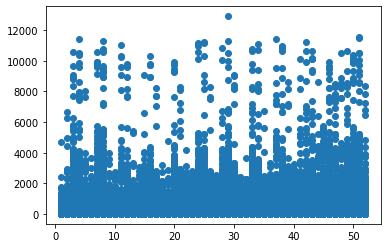

In [73]:
plt.scatter(train.weeks,train.number_of_customers)

In [74]:
#dropping week as it has no effect of explaining the no of customers visited the hotel

In [75]:
train.drop(['weeks'],axis=1,inplace=True)
test.drop(['weeks'],axis=1,inplace=True)

In [76]:
train_datecolumn=pd.DataFrame(train['date_of_operation'])


In [77]:
test_datecolumn=pd.DataFrame(test['date_of_operation'])

In [78]:
train.shape,test.shape

((65552, 6), (14850, 5))

In [79]:
train.dtypes

date_of_operation      datetime64[ns]
restaurant_type                object
state_of_operation             object
region_of_operation            object
number_of_customers             int64
days                            int64
dtype: object

In [80]:
for cols in ["restaurant_type","state_of_operation","region_of_operation"]:
    train[cols] = train[cols].astype('int64')

In [81]:
for cols in ["restaurant_type","state_of_operation","region_of_operation"]:
    test[cols] = test[cols].astype('int64')

In [82]:
train.dtypes

date_of_operation      datetime64[ns]
restaurant_type                 int64
state_of_operation              int64
region_of_operation             int64
number_of_customers             int64
days                            int64
dtype: object

In [83]:
test.dtypes

date_of_operation      datetime64[ns]
restaurant_type                 int64
state_of_operation              int64
region_of_operation             int64
days                            int64
dtype: object

In [84]:
train.drop(['date_of_operation'],axis=1,inplace=True)

In [85]:
test.drop(['date_of_operation'],axis=1,inplace=True)

In [86]:
train.head()

,restaurant_type,state_of_operation,region_of_operation,number_of_customers,days
0,1,5,3,40,4
1,1,5,3,5,4
2,1,5,3,4,4
3,1,5,3,113,4
4,1,5,3,76,4


In [87]:
x = pd.DataFrame(train.copy().drop("number_of_customers",axis=1))
y = pd.DataFrame(train["number_of_customers"])

In [88]:
x_train=x.iloc[:52400,:]

In [89]:
x_train.shape

(52400, 4)

In [90]:
x_val=x.iloc[52400:,:]

In [91]:
y_train=y.iloc[:52400,:]

In [92]:
y_val=y.iloc[52400:,:]

In [93]:
x.shape,y.shape

((65552, 4), (65552, 1))

In [94]:
x_train.shape,x_val.shape,y_train.shape,y_val.shape

((52400, 4), (13152, 4), (52400, 1), (13152, 1))

# linear model

In [95]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics


from sklearn.metrics import mean_squared_error
model=LinearRegression()


In [96]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
preds_train = model.predict(x_train)
preds_val = model.predict(x_val)


In [98]:
print('MAE:',metrics.mean_absolute_error((y_train),preds_train))
print('MSE:',metrics.mean_squared_error((y_train),preds_train))
print('RMSE:',np.sqrt(metrics.mean_squared_error((y_train),preds_train)))
print('MAPE:',np.mean(np.abs((y_train-preds_train)/(y_train)))*100)

MAE: 35.168160743534386
MSE: 4158.632186994449
RMSE: 64.48745759443807
MAPE: number_of_customers    inf
dtype: float64


In [99]:
y_train['number_of_customers'][y_train['number_of_customers']==0]=33   #replacing


C:\Users\SivaKumar\Anaconda3\lib\site-packages\pandas\core\generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\SivaKumar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [100]:
y_val['number_of_customers'][y_val['number_of_customers']==0]=33  #replacing


# linear reg with log trans

In [101]:
model.fit(x_train,np.log(y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
preds_train_l = model.predict(x_train)
preds_val_l = model.predict(x_val)


In [103]:
print('MAE:',metrics.mean_absolute_error(np.log(y_train),preds_train_l))
print('MSE:',metrics.mean_squared_error(np.log(y_train),preds_train_l))
print('RMSE:',np.sqrt(metrics.mean_squared_error(np.log(y_train),preds_train_l)))
MAPE_val_log=np.mean(np.abs(np.log(y_train) - preds_train_l)/np.log(y_train))
print(MAPE_val_log)


MAE: 0.7542298564849893
MSE: 1.098155524713351
RMSE: 1.0479291601598606
number_of_customers    inf
dtype: float64


# linear reg np.cbrt 

In [104]:
model.fit(x_train,np.cbrt(y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
preds_train_s = model.predict(x_train)
preds_val_s = model.predict(x_val)


In [106]:
print('MAE:',metrics.mean_absolute_error(np.cbrt(y_train),preds_train_s))
print('MSE:',metrics.mean_squared_error(np.cbrt(y_train),preds_train_s))
print('RMSE:',np.sqrt(metrics.mean_squared_error(np.cbrt(y_train),preds_train_s)))
MAPE_train_s=np.mean(np.abs(np.cbrt(y_train) - preds_train_s)/np.cbrt(y_train))*100
print(MAPE_train_s)

MAE: 0.7182721677045812
MSE: 1.1251525681525465
RMSE: 1.060732090658403
number_of_customers    28.387569
dtype: float64


In [107]:
preds_train_s

array([[3.02737898],
       [3.02737898],
       [3.02737898],
       ...,
       [3.14383706],
       [3.15442415],
       [3.16501125]])

In [108]:
predssub=pd.DataFrame(np.power(preds_train_s,3))

In [109]:
predssub

,0
0,27.746000
1,27.746000
2,27.746000
3,27.746000
4,27.746000
...,...
52395,30.449158
52396,30.759915
52397,31.072778
52398,31.387756


In [110]:
print('MAE:',metrics.mean_absolute_error(np.cbrt(y_val),preds_val_s))
print('MSE:',metrics.mean_squared_error(np.cbrt(y_val),preds_val_s))
print('RMSE:',np.sqrt(metrics.mean_squared_error(np.cbrt(y_val),preds_val_s)))
MAPE_train_s=np.mean(np.abs(np.cbrt(y_val) - preds_val_s)/np.cbrt(y_val))*100
print(MAPE_train_s)

MAE: 3.858662493967798
MSE: 31.86496881300431
RMSE: 5.6449064485608895
number_of_customers    39.426309
dtype: float64


In [111]:
preds_val_s

array([[3.17559835],
       [3.18618545],
       [3.19677254],
       ...,
       [3.20735964],
       [3.21794674],
       [3.22853384]])

In [120]:
number_of_customers_val=pd.DataFrame(np.power(preds_val_s,3))

In [121]:
number_of_customers_val.shape

(13152, 1)

In [122]:
preds_test_s = model.predict(test)


In [123]:
test.shape

(14850, 4)

In [124]:
preds_test_s

array([[3.00620479],
       [3.00620479],
       [3.00620479],
       ...,
       [3.20735964],
       [3.21794674],
       [3.22853384]])

In [172]:
number_of_customers=pd.DataFrame(np.power(preds_test_s,3))

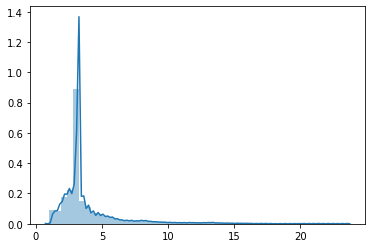

In [184]:
import seaborn as sns
sns.distplot(pd.DataFrame(np.cbrt(y)))


In [173]:
number_of_customers

,0
0,27.167876
1,27.167876
2,27.167876
3,27.167876
4,27.167876
...,...
14845,32.345446
14846,32.668953
14847,32.994609
14848,33.322422


In [174]:
number_of_customers.columns=['number_of_customers']

In [175]:
number_of_customers

,number_of_customers
0,27.167876
1,27.167876
2,27.167876
3,27.167876
4,27.167876
...,...
14845,32.345446
14846,32.668953
14847,32.994609
14848,33.322422


In [176]:
number_of_customers

,number_of_customers
0,27.167876
1,27.167876
2,27.167876
3,27.167876
4,27.167876
...,...
14845,32.345446
14846,32.668953
14847,32.994609
14848,33.322422


In [177]:
test_predictions_test=number_of_customers.iloc[0:300,:]

In [178]:
test_predictions_test.shape

(300, 1)

In [179]:
test_predictions_test.to_csv('Predictions.csv')

In [128]:
y_train.describe()

,number_of_customers
count,52400.000000
mean,42.858683
std,61.643851
min,1.000000
25%,16.000000
50%,33.000000
75%,37.000000
max,1890.000000


In [129]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
Vif = pd.DataFrame()
Vif["VIF Factor"] = [variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
Vif["features"] = x_train.columns

In [130]:
Vif

,VIF Factor,features
0,25.879843,restaurant_type
1,1.008056,state_of_operation
2,1.008056,region_of_operation
3,1.000000,days


In [132]:
x_train_vif=x_train.drop(['restaurant_type'],axis=1)

In [134]:
x_val_vif=x_val.drop(['restaurant_type'],axis=1)

In [133]:
model.fit(x_train_vif,np.cbrt(y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
preds_train_vif_s = model.predict(x_train_vif)
preds_val__vif_s = model.predict(x_val_vif)


In [136]:
print('MAE:',metrics.mean_absolute_error(np.cbrt(y_train),preds_train_vif_s))
print('MSE:',metrics.mean_squared_error(np.cbrt(y_train),preds_train_vif_s))
print('RMSE:',np.sqrt(metrics.mean_squared_error(np.cbrt(y_train),preds_train_vif_s)))
MAPE_train_vif_s=np.mean(np.abs(np.cbrt(y_train) - preds_train_vif_s)/np.cbrt(y_train))*100
print(MAPE_train_vif_s)

MAE: 0.7182721677045812
MSE: 1.1251525681525463
RMSE: 1.0607320906584028
number_of_customers    28.387569
dtype: float64


# random forest

In [137]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor()
rfc

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [138]:
rfc.fit(X=x_train,y=np.sqrt(y_train))

C:\Users\SivaKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [139]:
preds_trainrf=rfc.predict(x_train)
preds_testrf=rfc.predict(x_val)

In [140]:
print('MAE:',metrics.mean_absolute_error(np.sqrt(y_train),preds_trainrf))
print('MSE:',metrics.mean_squared_error(np.sqrt(y_train),preds_trainrf))
print('RMSE:',np.sqrt(metrics.mean_squared_error(np.sqrt(y_train),preds_trainrf)))


MAE: 1.928023287769495
MSE: 8.149784158195818
RMSE: 2.854782681430553


# knn without parameter

In [141]:
from sklearn.neighbors import KNeighborsRegressor               # kNN regressor


In [142]:
knn_regressor = KNeighborsRegressor(n_neighbors=3,algorithm="brute",weights="distance")

In [143]:
knn_regressor.fit(x_train,np.cbrt(y_train))

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='distance')

In [144]:
preds_trainknn = knn_regressor.predict(x_train)

In [145]:
MAPE_train_knn=np.mean(np.abs(np.cbrt(y_train) - preds_trainknn)/np.cbrt(y_train))*100
print(MAPE_train_knn)

number_of_customers    37.631563
dtype: float64


# knn_parameter tunning

In [146]:
from sklearn.model_selection import GridSearchCV                # Grid search with CV


In [147]:
knn_regressor = KNeighborsRegressor(algorithm="brute",weights="distance")

In [148]:
params = {"n_neighbors": [1,3,5],"metric": ["euclidean", "cityblock"]}

In [149]:
grid = GridSearchCV(knn_regressor,param_grid=params,scoring="neg_mean_squared_error",cv=5)

In [150]:
grid.fit(x_train,np.cbrt(y_train))

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='brute', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='distance'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'cityblock'],
                         'n_neighbors': [1, 3, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [151]:
preds_trainknn_para = grid.predict(x_train)

In [152]:
MAPE_train_knn_para=np.mean(np.abs(np.cbrt(y_train) - preds_trainknn_para)/np.cbrt(y_train))*100
print(MAPE_train_knn_para)

number_of_customers    31.522733
dtype: float64


# decison Tree

In [153]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor


In [154]:
dtr_2 = DecisionTreeRegressor(max_depth = 2)

In [155]:
dtr_2.fit(x_train,np.cbrt(y_train))

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [156]:
preds_traindt = dtr_2.predict(x_train)
preds_testdt = dtr_2.predict(x_val)

In [157]:
print('MAE:',metrics.mean_absolute_error(np.cbrt(y_train),preds_traindt))
print('MSE:',metrics.mean_squared_error(np.log(y_train),preds_traindt))
print('RMSE:',np.sqrt(metrics.mean_squared_error(np.cbrt(y_train),preds_traindt)))


MAE: 0.7043301598291594
MSE: 1.0785823779534602
RMSE: 1.0268340683297938
